# Exploratory data analysis - EDA

Exploratory data analysis (EDA) is an approach of analyzing data sets to summarize their main characteristics, often using statistical graphics and other data visualization methods.


# TURNOVER EMPLOYEE


In This project, we analyze the rates of TURNOVER employees in an aleatory company.


### Hypothesis and Tasks

---
HYPOTHESIS:

**Possibility the employee left the company**

TASKS:
* Analisys the quality of dataset.
* Exploratory analisys.
* Caracteristics of employee leaving the company.


### **Import Librarys and Analyze the data** 

In [65]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 500)

import warnings
warnings.filterwarnings('ignore')


# LIBS FOR GRAPH
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

# sns.set_context('talk')
sns.set_palette('rainbow')
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

In [66]:
# Paletes of Colors
pal = sns.color_palette('rainbow')
pal.as_hex()

['#386df9', '#12c8e6', '#5af8c8', '#a4f89f', '#ecc86f', '#ff6d38']

In [67]:
local_csv = ('/content/drive/MyDrive/Colab_Notebooks/Bootcamp_Yandex/Webnar_extras/Lab2 - Turnover/turnover.csv')

In [68]:
df = pd.read_csv(local_csv)

In [69]:
df.head()

,Idade,Turnover,ViagensTrabalho,Departamento,DistanciaCasa,NivelEducacao,Educacao,NumeroEmpregado,NivelSatisfacaoAmbiente,Genero,PagamentoHora,Envolvimento,NivelCargo,Cargo,NivelSatisfacaoCargo,EstadoCivil,RendaMensal,QtdeEmpresasTrabalhadas,Acima18Anos,HoraExtra,PercentualAumentoSalario,AvaliacaoDesempenho,QtdeHorasTrabalhadasPadrao,TotalAnosTrabalhados,TreinamentosUltimoAno,BalanceamentoVidaTrabalho,QtdeAnosNaEmpresaAtual,QtdeAnosNoCargoAtual,QtdeAnosDesdeUltimaPromocao,QtdeAnosComGerenteAtual
0,41.0,Yes,Travel_Rarely,Sales,1,2,Life Sciences,1,2,Female,94,3,2,Sales Executive,4,Single,5993,8,Y,Yes,11,3,80,8,0,1,6,4,0,5
1,49.0,No,Travel_Frequently,Research & Development,8,1,Life Sciences,2,3,Male,61,2,2,Research Scientist,2,Married,5130,1,Y,No,23,4,80,10,3,3,10,7,1,7
2,37.0,Yes,Travel_Rarely,Research & Development,2,2,Other,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,6,Y,Yes,15,3,80,7,3,3,0,0,0,0
3,33.0,No,Travel_Frequently,Research & Development,3,4,Life Sciences,5,4,Female,56,3,1,Research Scientist,3,Married,2909,1,Y,Yes,11,3,80,8,3,3,8,7,3,0
4,27.0,No,Travel_Rarely,Research & Development,2,1,Medical,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,9,Y,No,12,3,80,6,3,3,2,2,2,2


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Idade                        1325 non-null   float64
 1   Turnover                     1470 non-null   object 
 2   ViagensTrabalho              1470 non-null   object 
 3   Departamento                 1470 non-null   object 
 4   DistanciaCasa                1470 non-null   int64  
 5   NivelEducacao                1470 non-null   int64  
 6   Educacao                     1470 non-null   object 
 7   NumeroEmpregado              1470 non-null   int64  
 8   NivelSatisfacaoAmbiente      1470 non-null   int64  
 9   Genero                       1470 non-null   object 
 10  PagamentoHora                1470 non-null   int64  
 11  Envolvimento                 1470 non-null   int64  
 12  NivelCargo                   1470 non-null   int64  
 13  Cargo             

In [71]:
df.mean()

Idade                            36.827925
DistanciaCasa                     9.192517
NivelEducacao                     2.912925
NumeroEmpregado                1024.865306
NivelSatisfacaoAmbiente           2.721769
PagamentoHora                    65.891156
Envolvimento                      2.729932
NivelCargo                        2.063946
NivelSatisfacaoCargo              2.728571
RendaMensal                    6502.931293
QtdeEmpresasTrabalhadas           2.693197
PercentualAumentoSalario         15.209524
AvaliacaoDesempenho               3.153741
QtdeHorasTrabalhadasPadrao       80.000000
TotalAnosTrabalhados             11.279592
TreinamentosUltimoAno             2.799320
BalanceamentoVidaTrabalho         2.761224
QtdeAnosNaEmpresaAtual            7.008163
QtdeAnosNoCargoAtual              4.229252
QtdeAnosDesdeUltimaPromocao       2.187755
QtdeAnosComGerenteAtual           4.123129
dtype: float64

## Data quality of analysis:
---
* missing values
* Inconsistent values
* Zeros / No variation

**PROBLEM SOLVING:**

For missing values we use the columns Year_worked, because we have more probability to have mean age and others.



In [72]:
pd.cut(df['TotalAnosTrabalhados'], bins = 10).value_counts()

(4.0, 8.0]      397
(8.0, 12.0]     382
(-0.04, 4.0]    228
(12.0, 16.0]    144
(16.0, 20.0]    112
(20.0, 24.0]     95
(24.0, 28.0]     49
(28.0, 32.0]     35
(32.0, 36.0]     21
(36.0, 40.0]      7
Name: TotalAnosTrabalhados, dtype: int64

In [73]:

df['Faixa_de_anos_trabalhados'] = pd.qcut(df['TotalAnosTrabalhados'], q=4)

qcut used to quantitatively bin data into equal-sized groups, or quantiles. The function takes in a data series and a number of bins as input, and returns a new series of categorical data, where each category represents a quantile.

For example, if you have a data series of ages and you want to divide them into 4 equal-sized groups, you can use the qcut function to create a new series that has 4 categories: "0-25%", "25-50%", "50-75%", and "75-100%". Each category represents a quantile, and the data is divided into these categories based on the quantile cut-offs.

The advantage of using qcut is that it ensures that each bin has an equal number of observations, which can be useful when working with data that has a non-uniform distribution.

In addition, qcut is useful for creating a categorical variable from a continuous variable, which can be beneficial in some data visualization and analysis tasks.

For example, you might be interested in understanding the relationship between the ages and income of the people in a certain country, by using qcut you can group the ages into quantiles, and use the resulting categorical variable to see how the income changes within each age group.

In [74]:
df.groupby('Faixa_de_anos_trabalhados')['Idade'].mean()

Faixa_de_anos_trabalhados
(-0.001, 6.0]    30.057214
(6.0, 10.0]      35.930556
(10.0, 15.0]     38.607955
(15.0, 40.0]     45.704762
Name: Idade, dtype: float64

In [75]:
df.groupby('Faixa_de_anos_trabalhados')['Idade'].median()

Faixa_de_anos_trabalhados
(-0.001, 6.0]    29.0
(6.0, 10.0]      35.0
(10.0, 15.0]     36.0
(15.0, 40.0]     46.0
Name: Idade, dtype: float64

In [76]:
df.groupby('Faixa_de_anos_trabalhados')['Idade'].transform('median')
#When we use the 'transform eu will convert and use only in the lines w/o information
# in the line 1 the median is 35 years and still the range 6 and 10 year worked.

0       35.0
1       35.0
2       35.0
3       35.0
4       29.0
        ... 
1465    46.0
1466    35.0
1467    29.0
1468    46.0
1469    29.0
Name: Idade, Length: 1470, dtype: float64

In [77]:
df['Idade'].fillna(df.groupby('Faixa_de_anos_trabalhados')['Idade'].transform('median'),inplace = True)

In [78]:
df['Idade'].isna().sum()

0

In [79]:
#Calculate the % of total
df['Idade'].isna().sum() /len(df)

0.0

In [80]:
#Using the qcut is better because you can see the data in boxes.
# the dataset distribuite the formulas
df['TotalAnosTrabalhados'].value_counts()

10    202
6     125
8     103
9      96
5      88
7      81
1      81
4      63
12     48
3      42
15     40
16     37
11     36
13     36
21     34
17     33
2      31
14     31
20     30
18     27
19     22
23     22
22     21
24     18
25     14
28     14
26     14
0      11
29     10
31      9
32      9
30      7
33      7
27      7
36      6
34      5
37      4
35      3
40      2
38      1
Name: TotalAnosTrabalhados, dtype: int64

## Univariable analysis
---
Definition of Univariable Analysis: Examination of a single variable at a time with the goal of understanding the distribution, patterns, and relationships of the variable being analyzed.

Example: Study of the relationship between age and blood pressure in a group of individuals.

In [81]:
df['Turnover'].value_counts()
# 1233 employee request to resigned 
# Date unbalanced

No     1233
Yes     237
Name: Turnover, dtype: int64

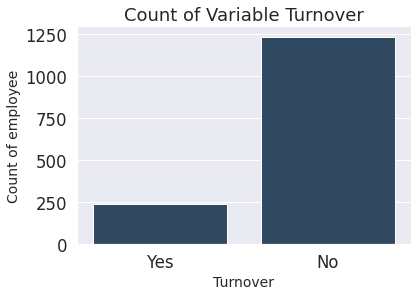

In [82]:
## Graph
sns.countplot('Turnover', data=df, color = '#284868')

# _= ignore the object with the informations

_= plt.title('Count of Variable Turnover')
plt.ylabel('Count of employee', fontsize = 14)
plt.xlabel('Turnover', fontsize = 14)

sns.despine() #remove the 2 lines in the graphs 


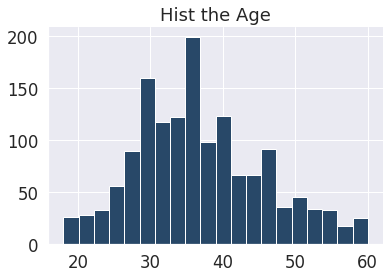

In [83]:
df['Idade'].hist(bins= 20, color = '#284868' )
_= plt.title('Hist the Age')
sns.despine()

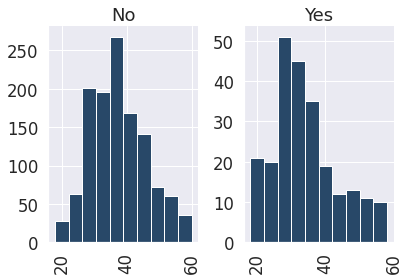

In [84]:
df['Idade'].hist(color = '#284868', by = df['Turnover'])

sns.despine()


In [85]:
bins = np.arange(df['Idade'].min(), df['Idade'].max(), 6)

hist, _ = np.histogram(df.query("Turnover == 'No'")['Idade'], bins = bins)
hist2, _ = np.histogram(df.query("Turnover == 'Yes'")['Idade'], bins = bins)

In [86]:
bins

array([18., 24., 30., 36., 42., 48., 54.])

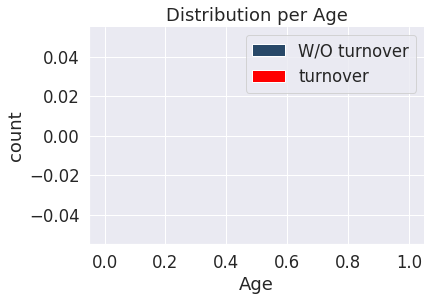

In [199]:
ax = plt.subplot(111)
df.query('Turnover == "No"')['Idade'].hist(ax=ax, label = 'W/O turnover', color ='#284868')
df.query('Turnover == "Yes"')['Idade'].hist(ax=ax, label = 'turnover', color = 'red')
plt.legend()
plt.title('Distribution per Age')
plt.xlabel('Age')
plt.ylabel('count')
sns.despine()

In [194]:
t = df.query('Turnover == 1')

t['Turnover'].value_counts()

1    237
Name: Turnover, dtype: int64

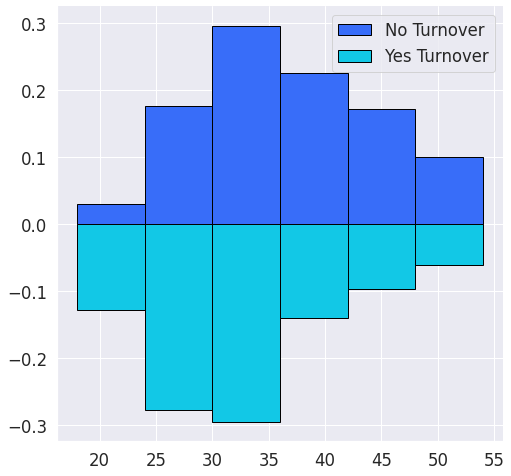

In [88]:
fig, ax = plt.subplots(figsize = (8,8))

ax.bar(bins[:-1], hist / np.sum(hist), width=np.diff(bins), edgecolor="black", align="edge", label = 'No Turnover');
ax.bar(bins[:-1], hist2 * -1 / np.sum(hist2), width=np.diff(bins), edgecolor="black", align="edge", label = 'Yes Turnover');
plt.legend()
sns.despine()

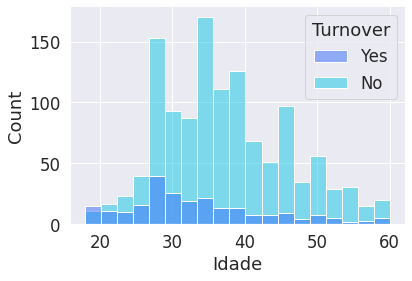

In [89]:
#Utilize libs seaborn
sns.histplot( x= 'Idade', data = df, hue = 'Turnover')
sns.despine()

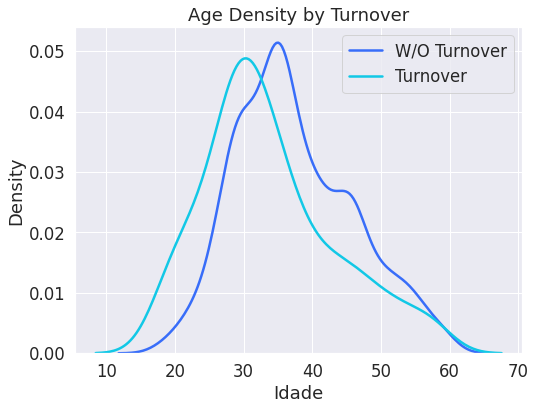

In [90]:
# This graph represent the Age density by turnover.
# 95% CHANCE of my datasets still between 20 years and 60 years.
fig, ax = plt.subplots(figsize = (8,6))
sns.kdeplot(x = 'Idade', data = df.query('Turnover == "No"'), label = 'W/O Turnover', ax = ax);
sns.kdeplot(x = 'Idade', data = df.query('Turnover == "Yes"'), ax = ax, label = 'Turnover');
plt.legend();
plt.title('Age Density by Turnover');

**We conclude about the AGExTURNOVER:**

**The younger the higher the turnover**

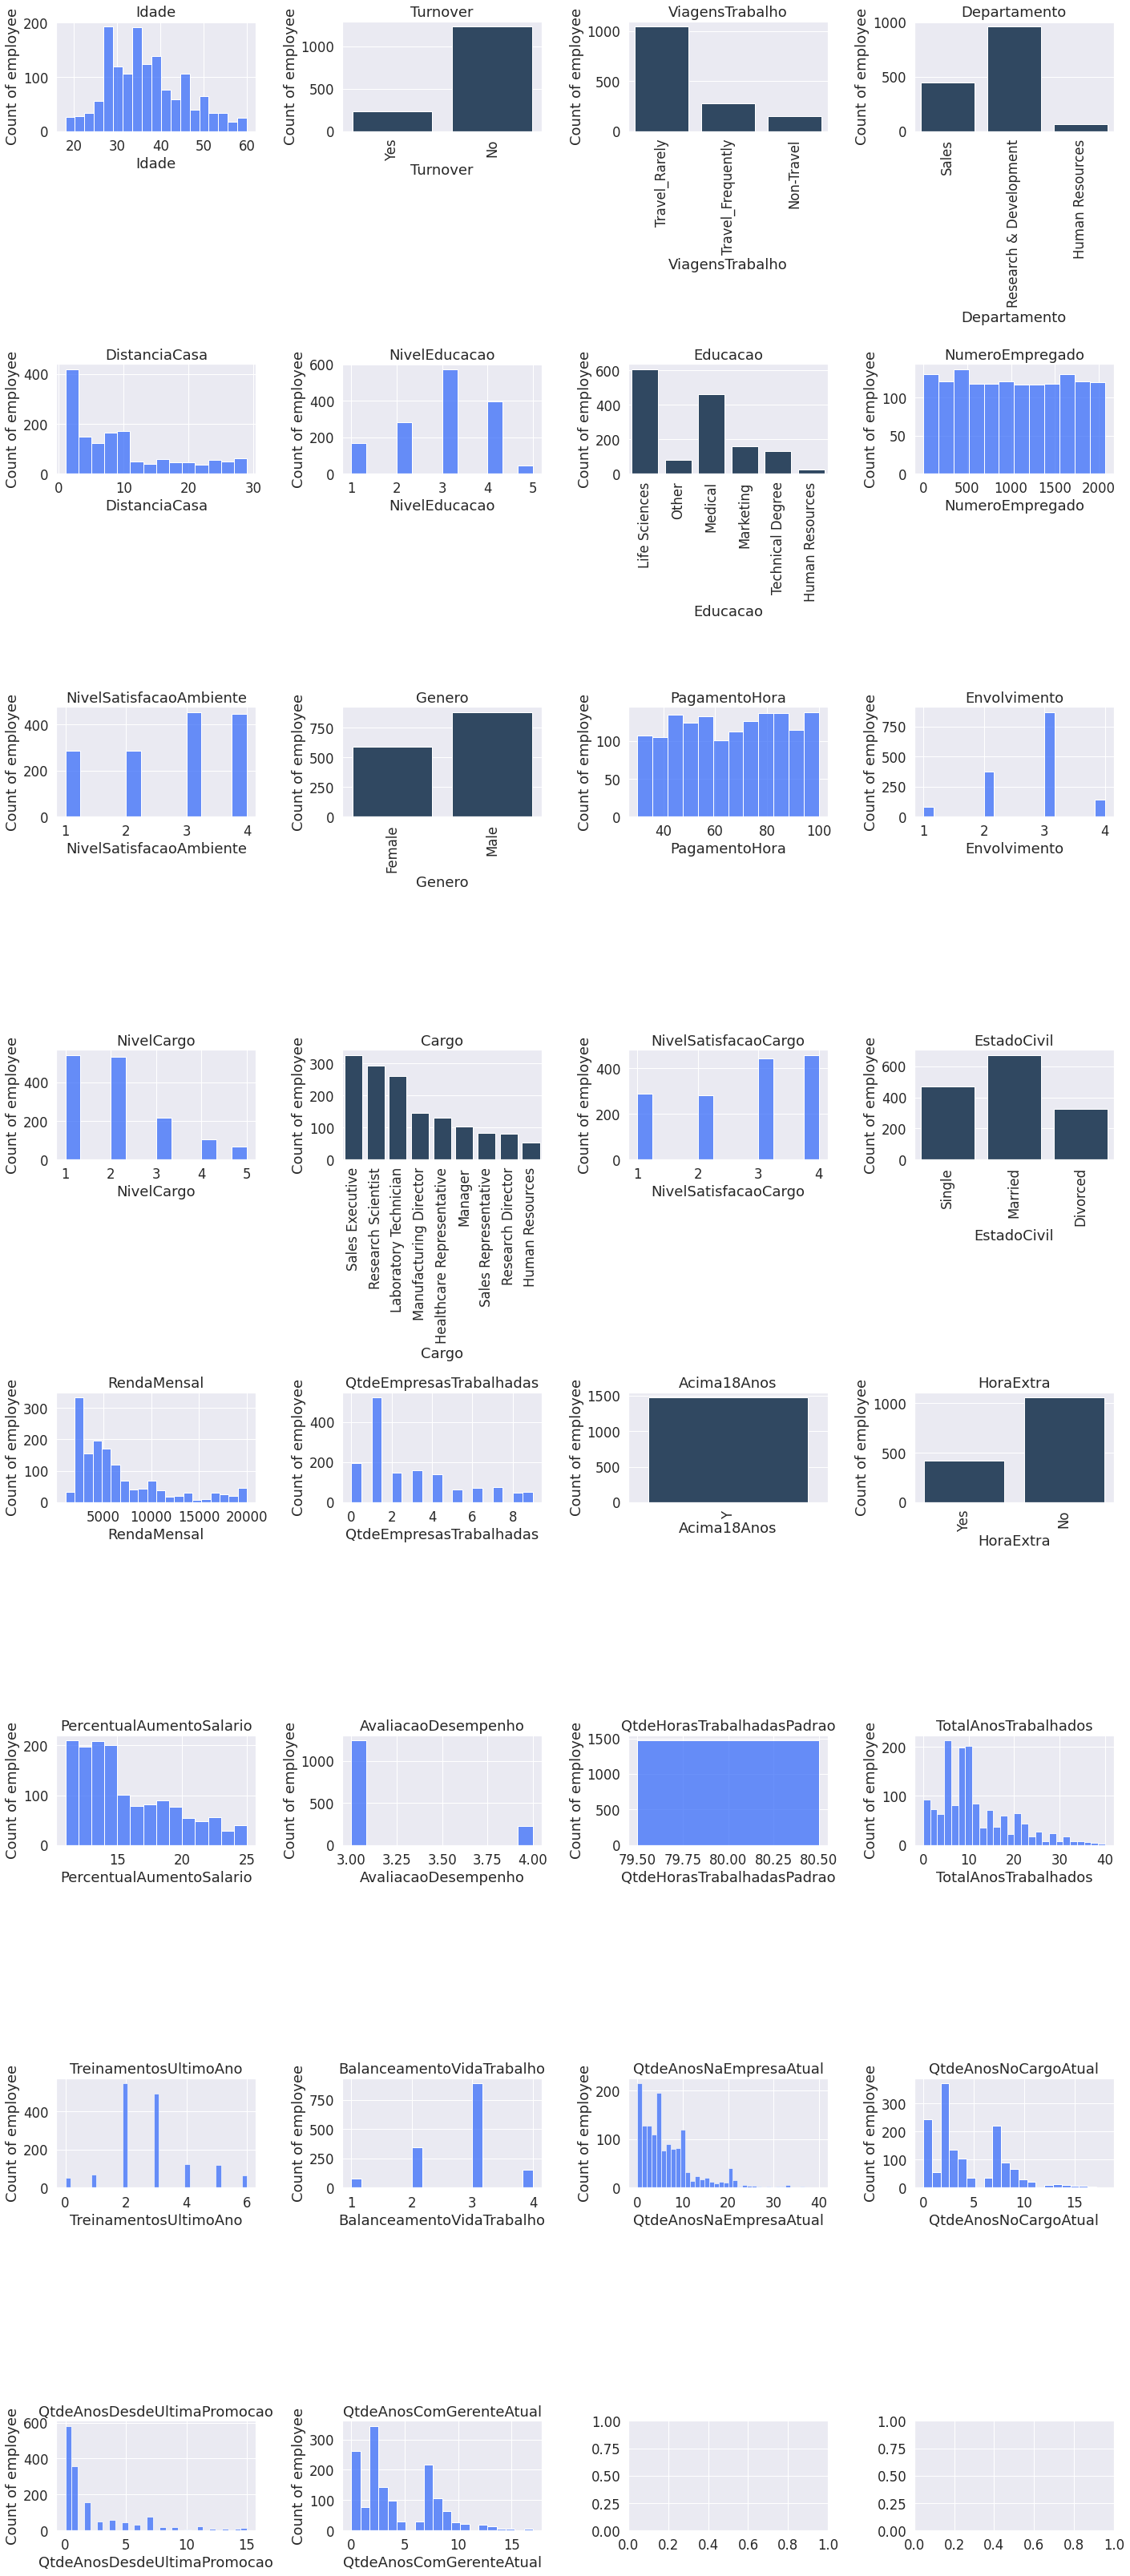

In [91]:
# HOW TO GET ONLY COLUMNS WITH SPECIFIC TYPE TO CREATE THE GRAPHS.
# how to read the information below?
# For all columns in my dataset 
#create the interaction 


fig, ax = plt.subplots(int(np.ceil((len(df.columns) - 1) / 4)), 4, figsize = (20, 45))
ax = ax.flatten()

# FOR ALL MY COLUMNS IN MY DATASET, CREATE THE INTERACTION
for i, col in enumerate(df.columns):
  if col == "Faixa_de_anos_trabalhados":
    continue
  if df.dtypes[col] == 'object':
    
    sns.countplot(col, data = df, color = '#284869', ax = ax[i])
    ax[i].set_title(col)
    ax[i].set_ylabel('Count of employee')
    ax[i].set_xticklabels([x.get_text() for x in ax[i].get_xticklabels()], rotation = 90)
  else:
    sns.histplot(x = col, data = df, ax = ax[i])
    ax[i].set_title(col)
    ax[i].set_ylabel('Count of employee')

plt.tight_layout()

TypeError: ignored

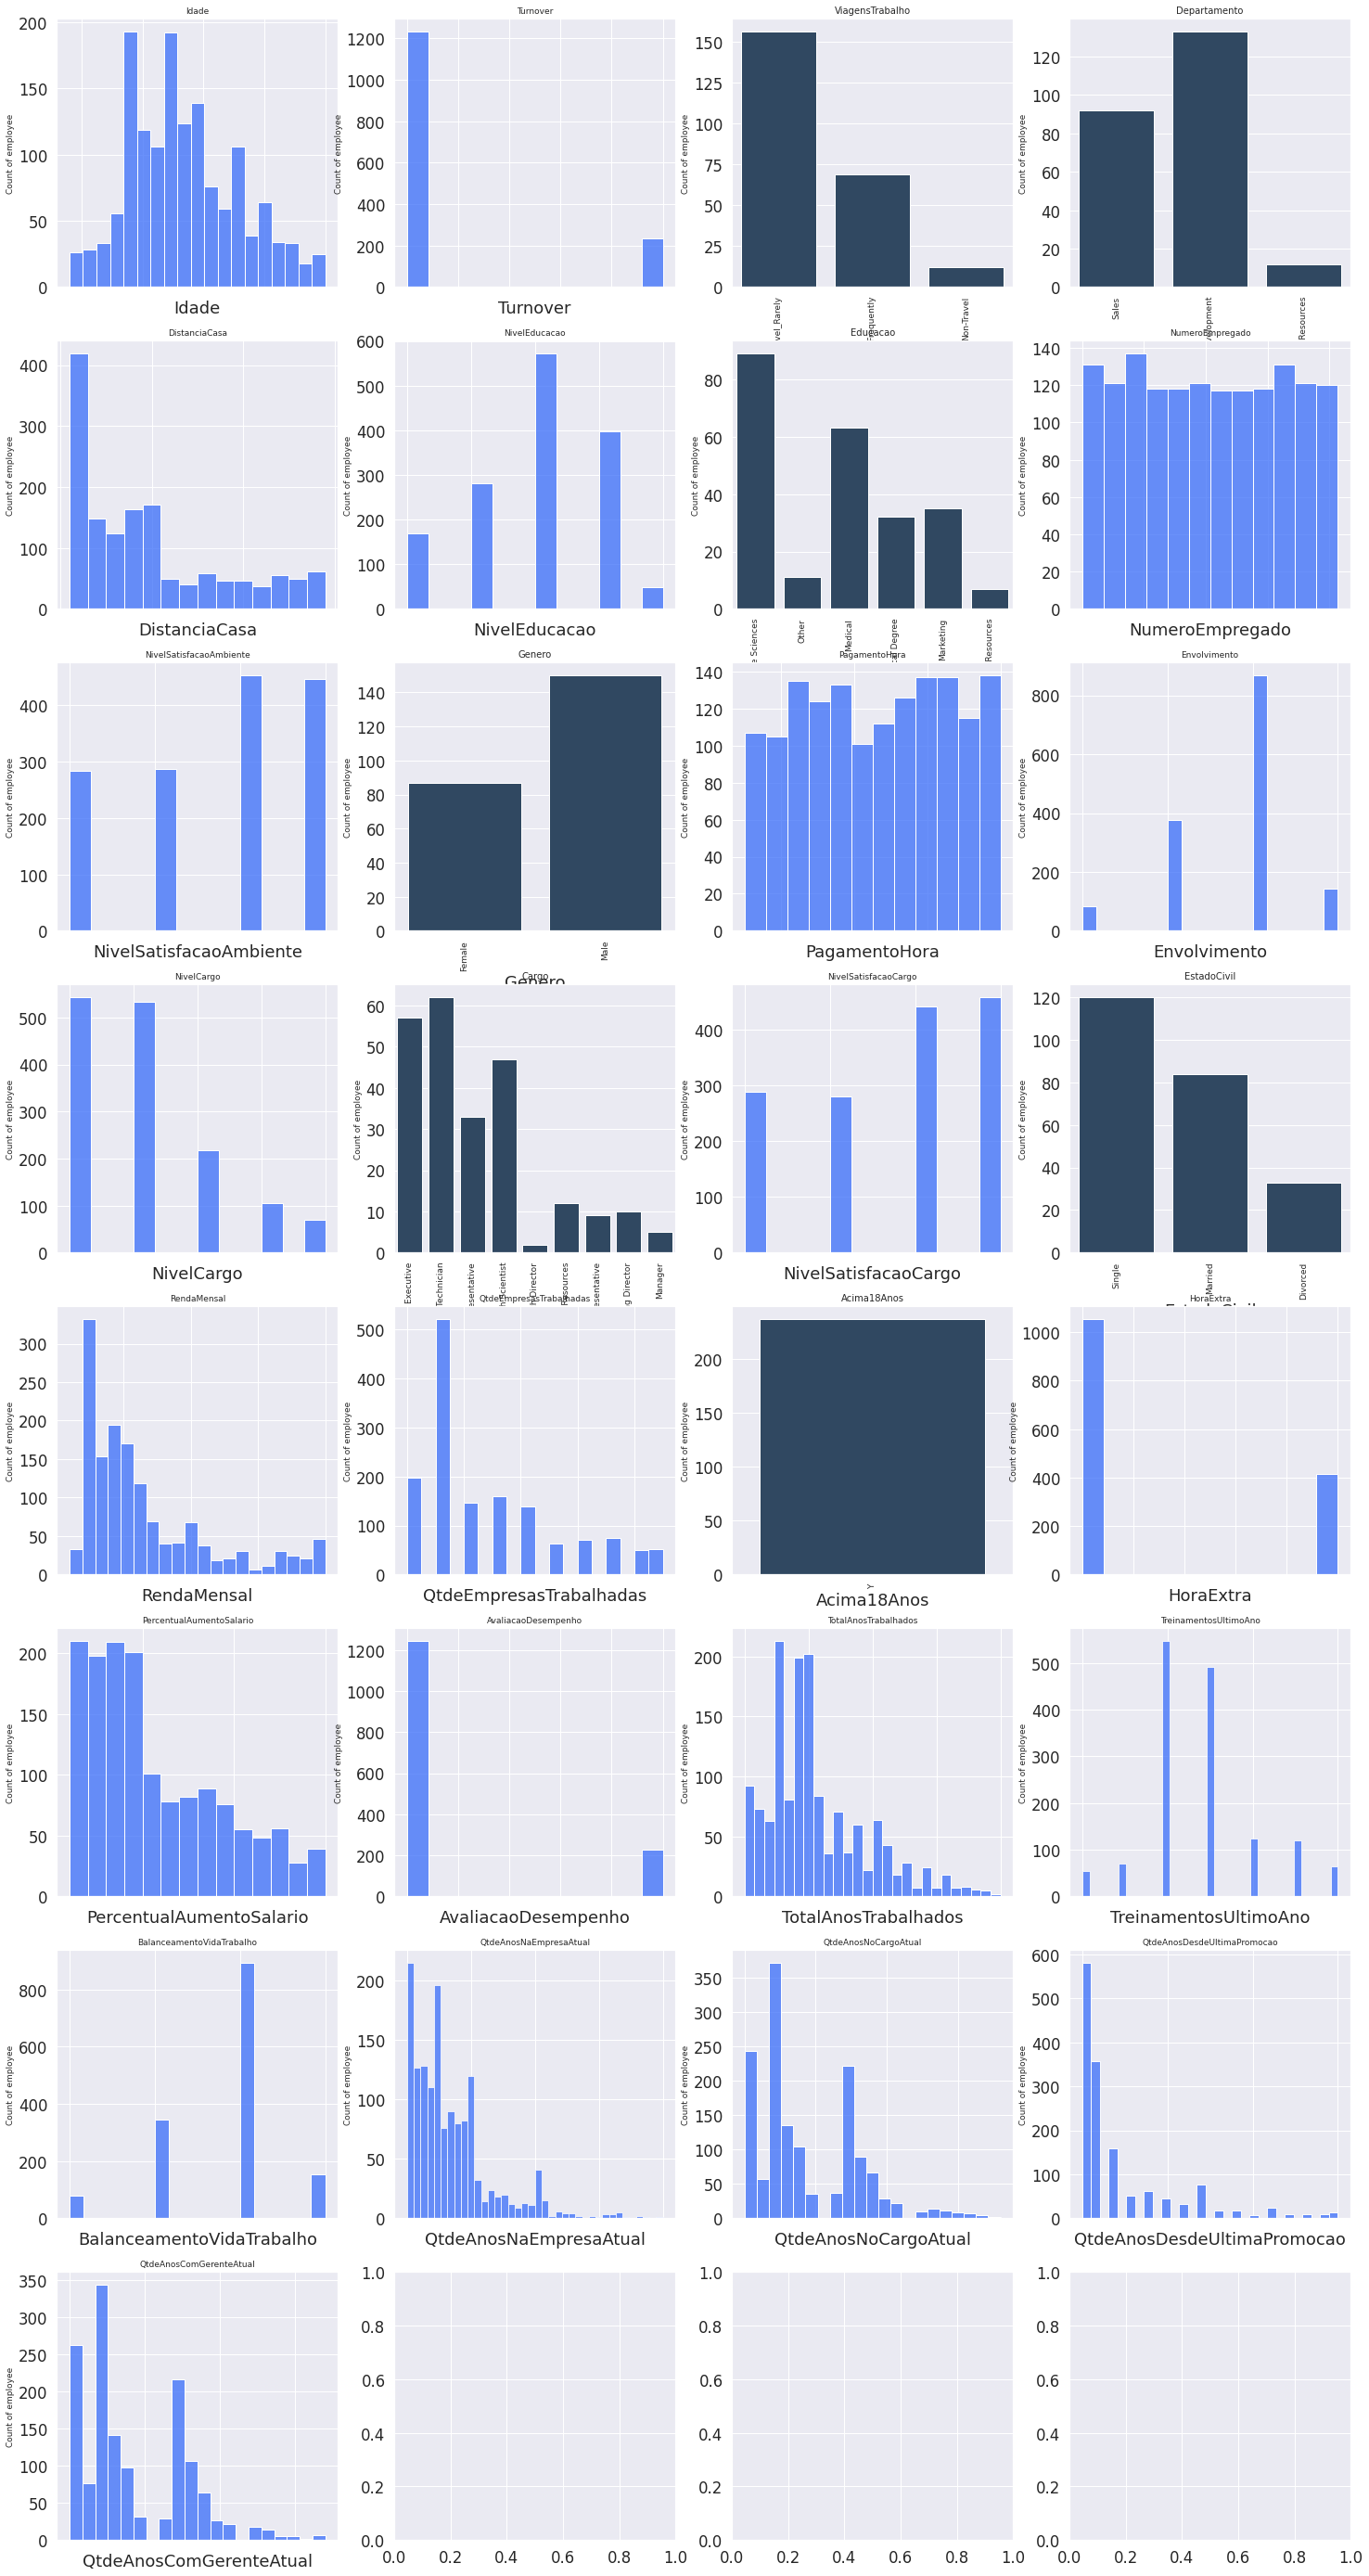

In [221]:
# HOW TO GET ONLY COLUMNS WITH SPECIFIC TYPE TO CREATE THE GRAPHS.
# how to read the information below?
# For all columns in my dataset 
#create the interaction 


fig, ax = plt.subplots(int(np.ceil((len(t.columns) - 1) / 4)), 4, figsize = (25, 50))
ax = ax.flatten()

# FOR ALL MY COLUMNS IN MY DATASET, CREATE THE INTERACTION
for i, col in enumerate(t.columns):
  if col == "Faixa_de_anos_trabalhados":
    continue
  if t.dtypes[col] == 'object':
    
    sns.countplot(col, data = t, color = '#284869', ax = ax[i])
    ax[i].set_title(col, fontsize= 10)
    ax[i].set_ylabel('Count of employee', fontsize = 9)
    ax[i].set_xticklabels([x.get_text() for x in ax[i].get_xticklabels()], rotation = 90, fontsize = 9)
  else:
    sns.histplot(x = col, data = df, ax = ax[i])
    ax[i].set_title(col, fontsize = 9)
    ax[i].set_ylabel('Count of employee', fontsize= 9)
    ax[i].set_xticklabels([x.get_text() for x in ax[i].get_xticklabels()], rotation = 90, fontsize = 9)
plt.tight_layout()

## Multivariable Analysis
Definition of Multivariable Analysis: Examination of multiple variables at the same time with the goal of understanding the complex relationships and interactions between different variables.

Example: Study of the relationship between diet, physical activity, and body mass index (BMI) in a group of individuals.

In [92]:
#TRANSFORM THE TEXT IN NUMBER

df['HoraExtra'] = df['HoraExtra'].map({ 'Yes' : 1, 'No' : 0 })



In [93]:
df['Turnover'] = df['Turnover'].map({ 'Yes' : 1, 'No' : 0 })

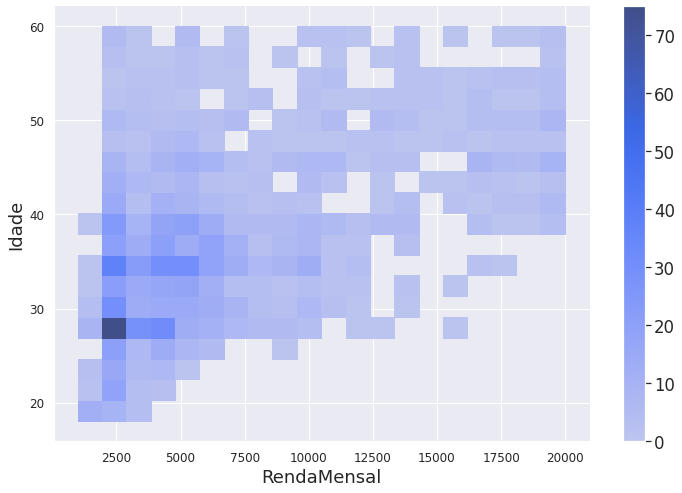

In [94]:
fig, ax = plt.subplots(figsize = (12,8))
sns.histplot(x = 'RendaMensal', y = 'Idade', data = df, ax = ax, cbar=True)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
sns.despine()

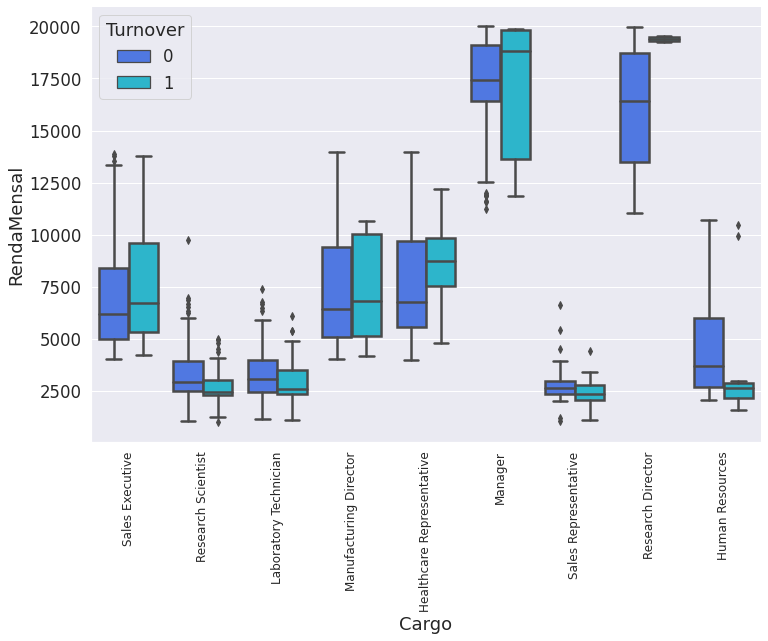

In [140]:
# ANALISE THE SALARY DIFFERENCE BETWEEN TURNOVER AND NOT 

fig, ax = plt.subplots(figsize = (12,8))
sns.boxplot('Cargo', 'RendaMensal', hue = 'Turnover', data = df, ax = ax)
plt.xticks(rotation = 90, fontsize = 12)
sns.despine()

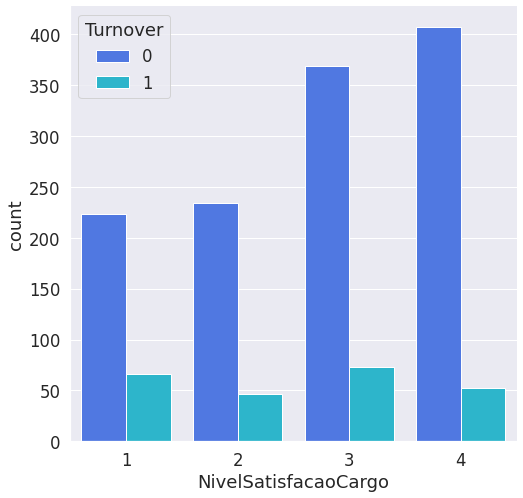

In [96]:
#Analyse the satisfaction employee

fig, ax = plt.subplots(figsize = (8,8))
sns.countplot('NivelSatisfacaoCargo', hue = 'Turnover', data = df);
sns.despine()

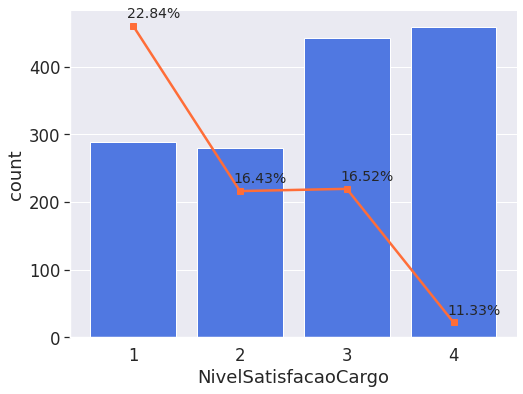

In [97]:

fig, ax = plt.subplots(figsize = (8,6))
g = df.groupby('NivelSatisfacaoCargo')['Turnover'].mean().reset_index()
# g['Turnover'] *= 100
sns.countplot('NivelSatisfacaoCargo', data = df, ax = ax, color = '#386df9');

ax2 = ax.twinx()

ax2.plot(range(g['NivelSatisfacaoCargo'].nunique()), g['Turnover'], '-s', color ='#ff6d38')
ax2.grid(False)
ax2.get_yaxis().set_ticks([])

for x,y in zip(range(g['NivelSatisfacaoCargo'].nunique()), g['Turnover'].values):
    label = "{:.2%}".format(y)
    ax2.annotate(label, 
                 (x,y), 
                 textcoords="offset points", 
                 xytext=(20,8),
                 size = 14, 
                 ha='center') 

sns.despine()
     

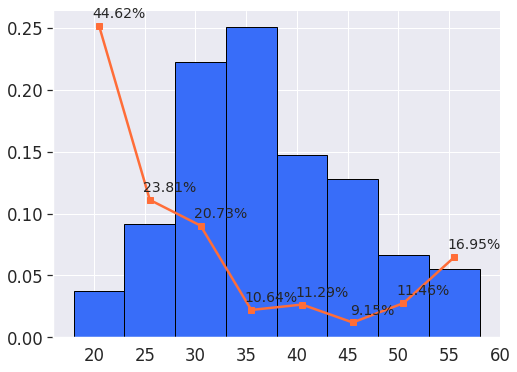

In [98]:
spacing  = 5
bins = np.arange(df['Idade'].min(), df['Idade'].max(), spacing)

hist, _ = np.histogram(df['Idade'], bins = bins)

fig, ax = plt.subplots(figsize = (8,6))
ax.bar(bins[:-1], hist / np.sum(hist), width=np.diff(bins), edgecolor="black", align="edge",color = '#386df9' );

ax2 = ax.twinx()

df['group'] = pd.cut(df['Idade'], len(bins) - 1)
g = df.groupby('group')['Turnover'].mean().reset_index()

ax2.plot(bins[:-1] + spacing / 2, g['Turnover'], '-s', color ='#ff6d38')
ax2.grid(False)
ax2.get_yaxis().set_ticks([])

for x,y in zip(np.array(bins) + spacing / 2, g['Turnover'].values):
    label = "{:.2%}".format(y)
    ax2.annotate(label, 
                 (x,y), 
                 textcoords="offset points", 
                 xytext=(20,8),
                 size = 14, 
                 ha='center') 

sns.despine()

## **Statistics Analysis**

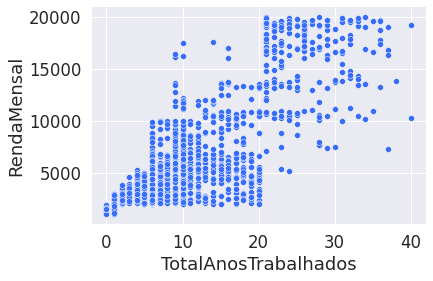

In [99]:
#Pearson Correlation coefficiente
sns.scatterplot('TotalAnosTrabalhados', 'RendaMensal', data = df)
sns.despine()

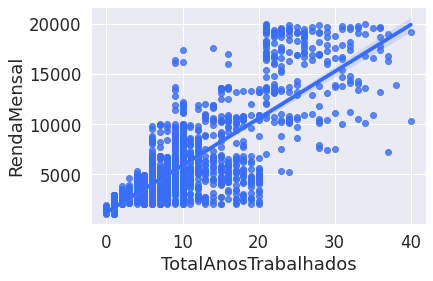

In [100]:
sns.regplot('TotalAnosTrabalhados', 'RendaMensal', data = df);

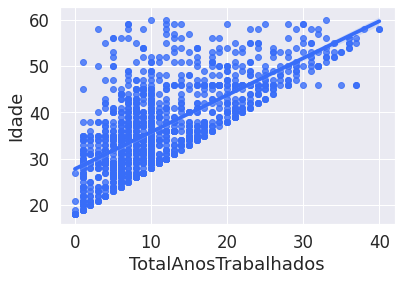

In [101]:
sns.regplot('TotalAnosTrabalhados', 'Idade', data = df);


In [102]:
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(x= df['TotalAnosTrabalhados'], y= df['Idade'])

In [103]:
slope, intercept

(0.7969381038739013, 27.816305646031864)

### **Correlações**

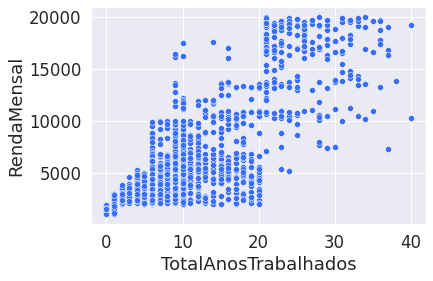

In [104]:
sns.scatterplot('TotalAnosTrabalhados', 'RendaMensal', data = df);

In [105]:
df.corr()

,Idade,Turnover,DistanciaCasa,NivelEducacao,NumeroEmpregado,NivelSatisfacaoAmbiente,PagamentoHora,Envolvimento,NivelCargo,NivelSatisfacaoCargo,RendaMensal,QtdeEmpresasTrabalhadas,HoraExtra,PercentualAumentoSalario,AvaliacaoDesempenho,QtdeHorasTrabalhadasPadrao,TotalAnosTrabalhados,TreinamentosUltimoAno,BalanceamentoVidaTrabalho,QtdeAnosNaEmpresaAtual,QtdeAnosNoCargoAtual,QtdeAnosDesdeUltimaPromocao,QtdeAnosComGerenteAtual
Idade,1.000000,-0.154434,-0.011794,0.188978,-0.014954,0.013569,0.019006,0.030255,0.526272,-0.011794,0.513357,0.288980,0.026365,-0.007376,0.000844,NaN,0.698466,-0.020780,-0.027600,0.329848,0.225214,0.223931,0.211615
Turnover,-0.154434,1.000000,0.077924,-0.031373,-0.010577,-0.103369,-0.006846,-0.130016,-0.169105,-0.103481,-0.159840,0.043494,0.246118,-0.013478,0.002889,NaN,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
DistanciaCasa,-0.011794,0.077924,1.000000,0.021042,0.032916,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,-0.029251,0.025514,0.040235,0.027110,NaN,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
NivelEducacao,0.188978,-0.031373,0.021042,1.000000,0.042070,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,0.126317,-0.020322,-0.011111,-0.024539,NaN,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
NumeroEmpregado,-0.014954,-0.010577,0.032916,0.042070,1.000000,0.017621,0.035179,-0.006888,-0.018519,-0.046247,-0.014829,-0.001251,-0.024037,-0.012944,-0.020359,NaN,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
NivelSatisfacaoAmbiente,0.013569,-0.103369,-0.016075,-0.027128,0.017621,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,0.012594,0.070132,-0.031701,-0.029548,NaN,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
PagamentoHora,0.019006,-0.006846,0.031131,0.016775,0.035179,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,0.022157,-0.007782,-0.009062,-0.002172,NaN,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
Envolvimento,0.030255,-0.130016,0.008783,0.042438,-0.006888,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,0.015012,-0.003507,-0.017205,-0.029071,NaN,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
NivelCargo,0.526272,-0.169105,0.005303,0.101589,-0.018519,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,0.142501,0.000544,-0.034730,-0.021222,NaN,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
NivelSatisfacaoCargo,-0.011794,-0.103481,-0.003669,-0.011296,-0.046247,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,-0.007157,-0.055699,0.024539,0.020002,0.002297,NaN,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656


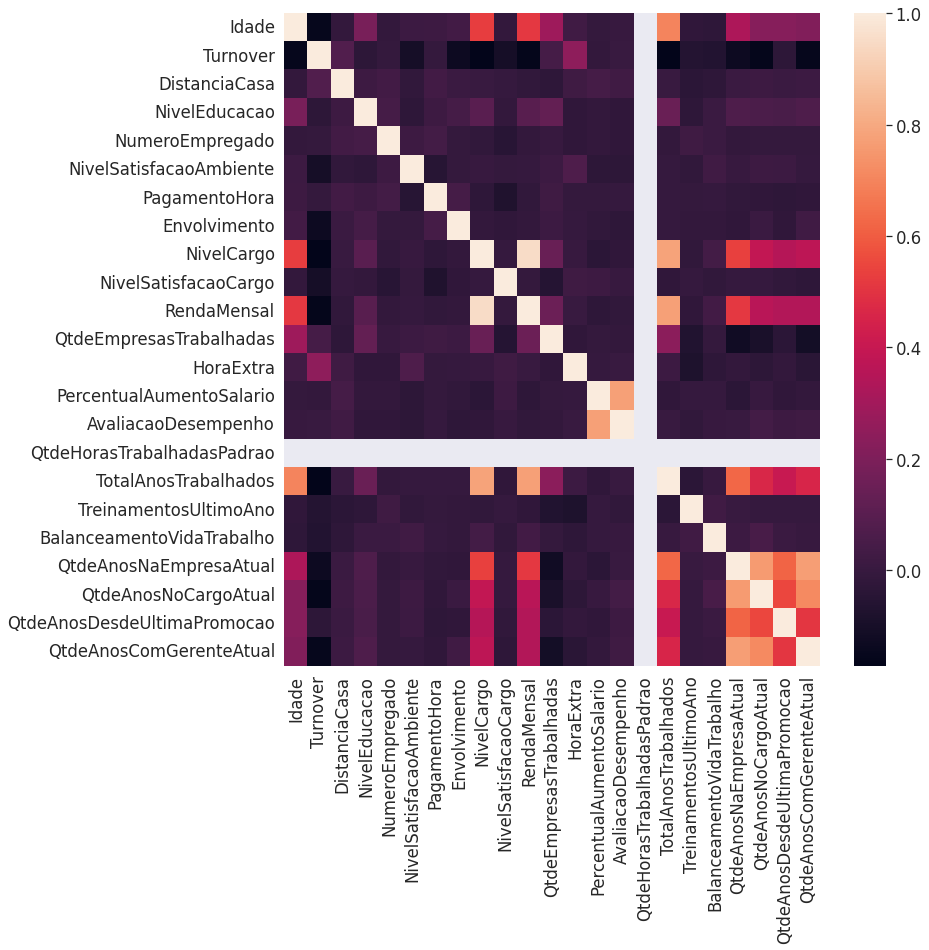

In [106]:
fig = plt.figure(figsize = (12,12))
sns.heatmap(df.corr());

In [107]:
df.drop(columns = ['QtdeHorasTrabalhadasPadrao'], inplace = True)

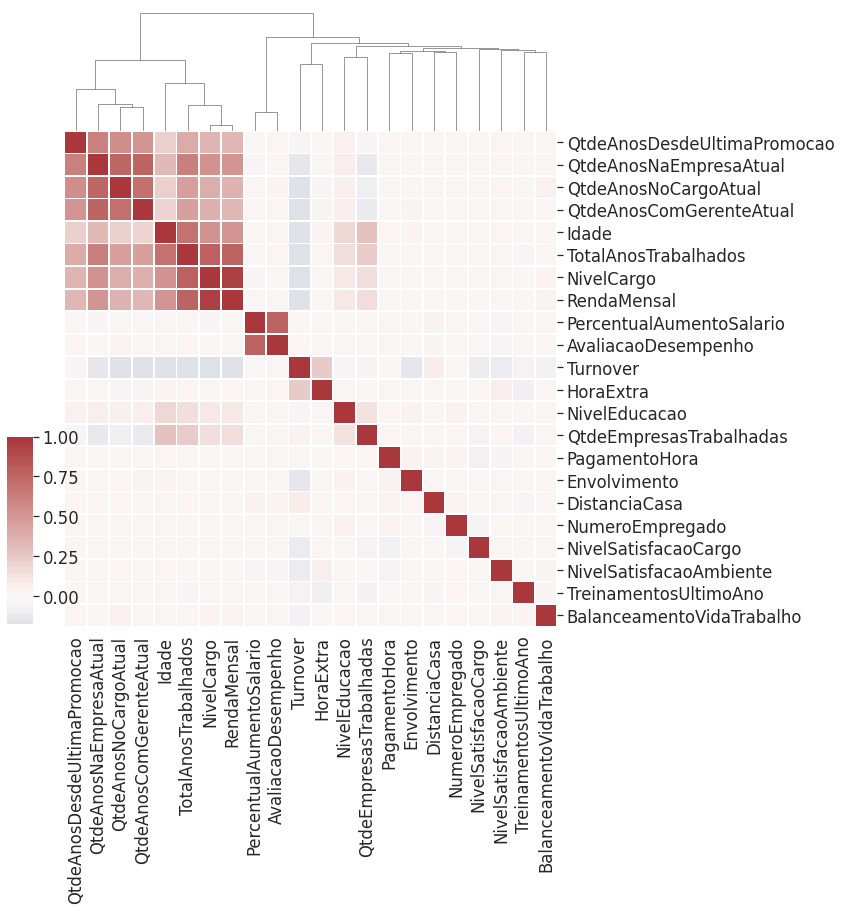

In [108]:
g = sns.clustermap(df.corr(), center=0, cmap="vlag",
                   dendrogram_ratio=(.1, .2),
                   cbar_pos=(.02, .32, .03, .2),
                   linewidths=.75, figsize=(12, 13))
g.ax_row_dendrogram.remove()


In [109]:
df.corr().style.background_gradient(cmap = 'coolwarm').set_precision(2)

,Idade,Turnover,DistanciaCasa,NivelEducacao,NumeroEmpregado,NivelSatisfacaoAmbiente,PagamentoHora,Envolvimento,NivelCargo,NivelSatisfacaoCargo,RendaMensal,QtdeEmpresasTrabalhadas,HoraExtra,PercentualAumentoSalario,AvaliacaoDesempenho,TotalAnosTrabalhados,TreinamentosUltimoAno,BalanceamentoVidaTrabalho,QtdeAnosNaEmpresaAtual,QtdeAnosNoCargoAtual,QtdeAnosDesdeUltimaPromocao,QtdeAnosComGerenteAtual
Idade,1.00,-0.15,-0.01,0.19,-0.01,0.01,0.02,0.03,0.53,-0.01,0.51,0.29,0.03,-0.01,0.00,0.70,-0.02,-0.03,0.33,0.23,0.22,0.21
Turnover,-0.15,1.00,0.08,-0.03,-0.01,-0.10,-0.01,-0.13,-0.17,-0.10,-0.16,0.04,0.25,-0.01,0.00,-0.17,-0.06,-0.06,-0.13,-0.16,-0.03,-0.16
DistanciaCasa,-0.01,0.08,1.00,0.02,0.03,-0.02,0.03,0.01,0.01,-0.00,-0.02,-0.03,0.03,0.04,0.03,0.00,-0.04,-0.03,0.01,0.02,0.01,0.01
NivelEducacao,0.19,-0.03,0.02,1.00,0.04,-0.03,0.02,0.04,0.10,-0.01,0.09,0.13,-0.02,-0.01,-0.02,0.15,-0.03,0.01,0.07,0.06,0.05,0.07
NumeroEmpregado,-0.01,-0.01,0.03,0.04,1.00,0.02,0.04,-0.01,-0.02,-0.05,-0.01,-0.00,-0.02,-0.01,-0.02,-0.01,0.02,0.01,-0.01,-0.01,-0.01,-0.01
NivelSatisfacaoAmbiente,0.01,-0.10,-0.02,-0.03,0.02,1.00,-0.05,-0.01,0.00,-0.01,-0.01,0.01,0.07,-0.03,-0.03,-0.00,-0.02,0.03,0.00,0.02,0.02,-0.00
PagamentoHora,0.02,-0.01,0.03,0.02,0.04,-0.05,1.00,0.04,-0.03,-0.07,-0.02,0.02,-0.01,-0.01,-0.00,-0.00,-0.01,-0.00,-0.02,-0.02,-0.03,-0.02
Envolvimento,0.03,-0.13,0.01,0.04,-0.01,-0.01,0.04,1.00,-0.01,-0.02,-0.02,0.02,-0.00,-0.02,-0.03,-0.01,-0.02,-0.01,-0.02,0.01,-0.02,0.03
NivelCargo,0.53,-0.17,0.01,0.10,-0.02,0.00,-0.03,-0.01,1.00,-0.00,0.95,0.14,0.00,-0.03,-0.02,0.78,-0.02,0.04,0.53,0.39,0.35,0.38
NivelSatisfacaoCargo,-0.01,-0.10,-0.00,-0.01,-0.05,-0.01,-0.07,-0.02,-0.00,1.00,-0.01,-0.06,0.02,0.02,0.00,-0.02,-0.01,-0.02,-0.00,-0.00,-0.02,-0.03


In [110]:
!pip install phik

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 KB 16.9 MB/s eta 0:00:00


PHI_K LIBS

Phi_K is a new and practical correlation coefficient based on several refinements to Pearson’s hypothesis test of independence of two variables.

In [111]:
import phik
from phik.report import plot_correlation_matrix
from phik import report

df.phik_matrix().style.background_gradient(cmap='coolwarm').set_precision(2)
# Quanto menor a idade maior a probabilidade de TRURNOVER

interval columns not set, guessing: ['Idade', 'Turnover', 'DistanciaCasa', 'NivelEducacao', 'NumeroEmpregado', 'NivelSatisfacaoAmbiente', 'PagamentoHora', 'Envolvimento', 'NivelCargo', 'NivelSatisfacaoCargo', 'RendaMensal', 'QtdeEmpresasTrabalhadas', 'HoraExtra', 'PercentualAumentoSalario', 'AvaliacaoDesempenho', 'TotalAnosTrabalhados', 'TreinamentosUltimoAno', 'BalanceamentoVidaTrabalho', 'QtdeAnosNaEmpresaAtual', 'QtdeAnosNoCargoAtual', 'QtdeAnosDesdeUltimaPromocao', 'QtdeAnosComGerenteAtual']


,Idade,Turnover,ViagensTrabalho,Departamento,DistanciaCasa,NivelEducacao,Educacao,NumeroEmpregado,NivelSatisfacaoAmbiente,Genero,PagamentoHora,Envolvimento,NivelCargo,Cargo,NivelSatisfacaoCargo,EstadoCivil,RendaMensal,QtdeEmpresasTrabalhadas,HoraExtra,PercentualAumentoSalario,AvaliacaoDesempenho,TotalAnosTrabalhados,TreinamentosUltimoAno,BalanceamentoVidaTrabalho,QtdeAnosNaEmpresaAtual,QtdeAnosNoCargoAtual,QtdeAnosDesdeUltimaPromocao,QtdeAnosComGerenteAtual,Faixa_de_anos_trabalhados,group
Idade,1.00,0.27,0.06,0.03,0.00,0.31,0.05,0.00,0.07,0.00,0.07,0.02,0.62,0.38,0.00,0.22,0.56,0.42,0.06,0.08,0.00,0.76,0.00,0.07,0.57,0.34,0.29,0.31,0.64,0.95
Turnover,0.27,1.00,0.07,0.05,0.09,0.00,0.12,0.00,0.17,0.01,0.03,0.20,0.18,0.23,0.15,0.10,0.28,0.14,0.37,0.00,0.00,0.30,0.07,0.14,0.23,0.22,0.07,0.23,0.26,0.28
ViagensTrabalho,0.06,0.07,1.00,0.00,0.04,0.00,0.00,0.00,0.00,0.02,0.00,0.02,0.00,0.00,0.00,0.12,0.04,0.00,0.01,0.08,0.00,0.00,0.00,0.00,0.00,0.00,0.03,0.11,0.01,0.00
Departamento,0.03,0.05,0.00,1.00,0.00,0.00,0.88,0.06,0.02,0.02,0.00,0.00,0.27,1.00,0.03,0.10,0.30,0.06,0.00,0.06,0.00,0.00,0.00,0.05,0.06,0.04,0.00,0.00,0.00,0.00
DistanciaCasa,0.00,0.09,0.04,0.00,1.00,0.00,0.00,0.00,0.00,0.03,0.00,0.06,0.13,0.00,0.00,0.00,0.11,0.02,0.08,0.06,0.07,0.09,0.04,0.00,0.00,0.00,0.00,0.07,0.05,0.00
NivelEducacao,0.31,0.00,0.00,0.00,0.00,1.00,0.08,0.11,0.02,0.00,0.06,0.00,0.23,0.09,0.02,0.00,0.22,0.24,0.00,0.06,0.00,0.25,0.04,0.00,0.17,0.09,0.00,0.00,0.12,0.21
Educacao,0.05,0.12,0.00,0.88,0.00,0.08,1.00,0.00,0.05,0.00,0.05,0.00,0.14,0.58,0.03,0.00,0.14,0.12,0.00,0.00,0.00,0.00,0.07,0.04,0.00,0.00,0.00,0.00,0.00,0.04
NumeroEmpregado,0.00,0.00,0.00,0.06,0.00,0.11,0.00,1.00,0.00,0.07,0.00,0.06,0.09,0.00,0.00,0.00,0.08,0.00,0.02,0.08,0.04,0.08,0.05,0.00,0.00,0.00,0.00,0.00,0.08,0.00
NivelSatisfacaoAmbiente,0.07,0.17,0.00,0.02,0.00,0.02,0.05,0.00,1.00,0.00,0.00,0.09,0.00,0.00,0.00,0.02,0.00,0.00,0.09,0.00,0.00,0.00,0.00,0.00,0.03,0.05,0.00,0.00,0.00,0.00
Genero,0.00,0.01,0.02,0.02,0.03,0.00,0.00,0.07,0.00,1.00,0.00,0.00,0.04,0.07,0.00,0.02,0.06,0.00,0.05,0.05,0.00,0.09,0.00,0.00,0.05,0.10,0.00,0.00,0.05,0.00


interval columns not set, guessing: ['Idade', 'Turnover', 'DistanciaCasa', 'NivelEducacao', 'NumeroEmpregado', 'NivelSatisfacaoAmbiente', 'PagamentoHora', 'Envolvimento', 'NivelCargo', 'NivelSatisfacaoCargo', 'RendaMensal', 'QtdeEmpresasTrabalhadas', 'HoraExtra', 'PercentualAumentoSalario', 'AvaliacaoDesempenho', 'TotalAnosTrabalhados', 'TreinamentosUltimoAno', 'BalanceamentoVidaTrabalho', 'QtdeAnosNaEmpresaAtual', 'QtdeAnosNoCargoAtual', 'QtdeAnosDesdeUltimaPromocao', 'QtdeAnosComGerenteAtual']


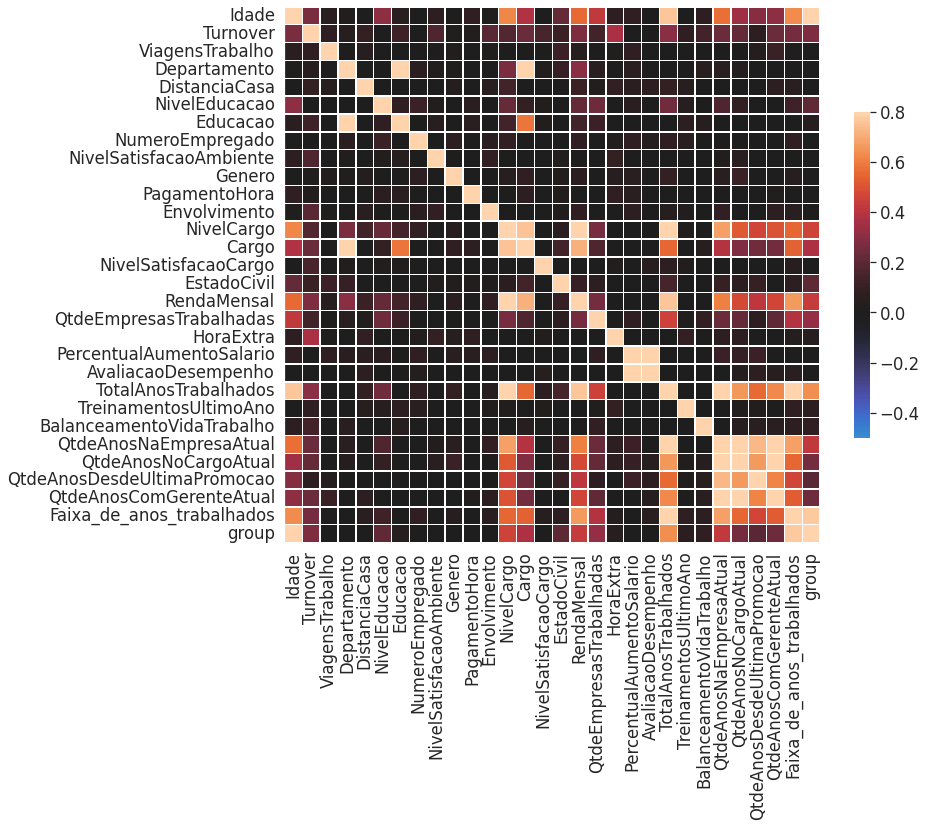

In [112]:
fig = plt.figure(figsize = (12,12))
sns.heatmap(df.phik_matrix(), vmax=.8, vmin = -0.5, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
sns.despine()

### **Q-Q Plot**

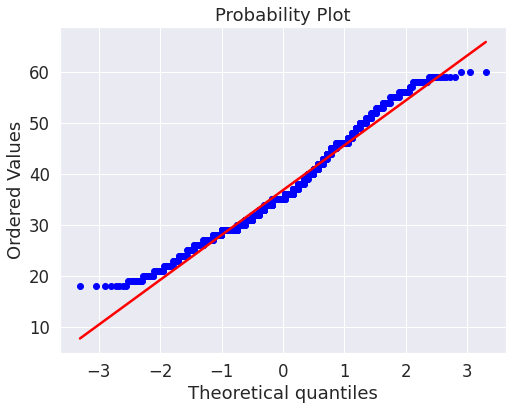

In [113]:
import scipy.stats as stats
fig, ax = plt.subplots(figsize = (8,6))
stats.probplot(df['Idade'], dist="norm", plot=plt)
plt.show()

**STATISTICS TEST**

In [114]:
from scipy.stats import shapiro

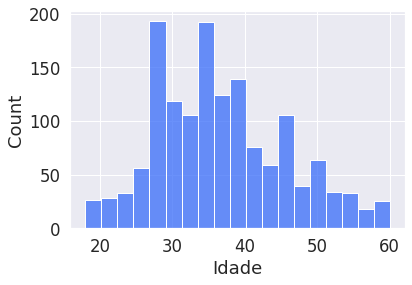

In [115]:
sns.histplot(x = df['Idade']);

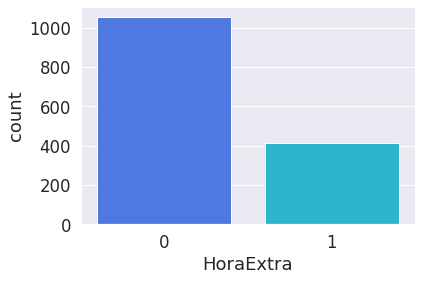

In [116]:
sns.countplot('HoraExtra', data = df);

In [117]:
shapiro(df['Idade'])

# We can reject our null hypothesis less than 0.05 or 5%

ShapiroResult(statistic=0.9760664105415344, pvalue=6.377565593278277e-15)

In [118]:
shapiro(np.log(df['Idade']))

# test in LOG format

ShapiroResult(statistic=0.9894431829452515, pvalue=8.018827379885352e-09)

In [119]:
from scipy.stats import shapiro

In [120]:
dist = np.random.normal(0, 1, 1000)

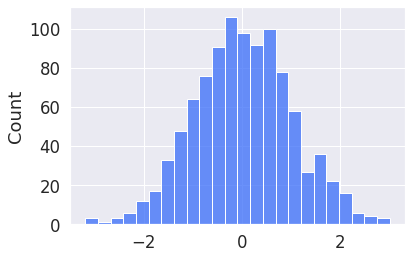

In [121]:
sns.histplot(x = dist);

In [122]:
shapiro(dist)

ShapiroResult(statistic=0.9989076256752014, pvalue=0.821905791759491)

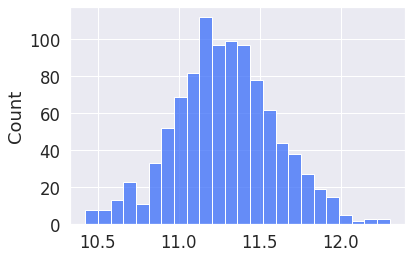

In [123]:
## CREATE LOOP FOR TEST MY STATISTIC TEST
means = []
for i in range(1000):
  mean = df['TotalAnosTrabalhados'].sample(frac = 0.4, replace = True).mean()
  means.append(mean)
sns.histplot(x = means)

In [124]:
from scipy.stats import ttest_ind

In [125]:
df.query('Turnover == 1').head()

,Idade,Turnover,ViagensTrabalho,Departamento,DistanciaCasa,NivelEducacao,Educacao,NumeroEmpregado,NivelSatisfacaoAmbiente,Genero,PagamentoHora,Envolvimento,NivelCargo,Cargo,NivelSatisfacaoCargo,EstadoCivil,RendaMensal,QtdeEmpresasTrabalhadas,Acima18Anos,HoraExtra,PercentualAumentoSalario,AvaliacaoDesempenho,TotalAnosTrabalhados,TreinamentosUltimoAno,BalanceamentoVidaTrabalho,QtdeAnosNaEmpresaAtual,QtdeAnosNoCargoAtual,QtdeAnosDesdeUltimaPromocao,QtdeAnosComGerenteAtual,Faixa_de_anos_trabalhados,group
0,41.0,1,Travel_Rarely,Sales,1,2,Life Sciences,1,2,Female,94,3,2,Sales Executive,4,Single,5993,8,Y,1,11,3,8,0,1,6,4,0,5,"(6.0, 10.0]","(39.0, 44.25]"
2,37.0,1,Travel_Rarely,Research & Development,2,2,Other,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,6,Y,1,15,3,7,3,3,0,0,0,0,"(6.0, 10.0]","(33.75, 39.0]"
14,28.0,1,Travel_Rarely,Research & Development,24,3,Life Sciences,19,3,Male,50,2,1,Laboratory Technician,3,Single,2028,5,Y,1,14,3,6,4,3,4,2,0,3,"(-0.001, 6.0]","(23.25, 28.5]"
21,36.0,1,Travel_Rarely,Sales,9,4,Life Sciences,27,3,Male,82,2,1,Sales Representative,1,Single,3407,7,Y,0,23,4,10,4,3,5,3,0,3,"(6.0, 10.0]","(33.75, 39.0]"
24,34.0,1,Travel_Rarely,Research & Development,6,1,Medical,31,2,Male,83,3,1,Research Scientist,1,Single,2960,2,Y,0,11,3,8,2,3,4,2,1,3,"(6.0, 10.0]","(33.75, 39.0]"


In [126]:
!pip install --upgrade scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 18.6 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.3
    Uninstalling scipy-1.7.3:
      Successfully uninstalled scipy-1.7.3


In [127]:
ttest_ind(df.query('Turnover == 1')['Idade'], df.query('Turnover == 0')['Idade'], alternative = 'less')

Ttest_indResult(statistic=-5.9889073678080145, pvalue=1.3261201316361038e-09)

In [128]:
shapiro(df.query('Turnover == 1')['Idade'])

ShapiroResult(statistic=0.9496654272079468, pvalue=2.547285475884564e-07)

In [129]:
shapiro(df.query('Turnover == 0')['Idade'])

ShapiroResult(statistic=0.9757171869277954, pvalue=1.5327111324917042e-13)

In [130]:
from scipy.stats import wilcoxon

In [131]:
wilcoxon(df.query('Turnover == 1')['Idade'].sample(200), df.query('Turnover == 0')['Idade'].sample(200), alternative = 'less').pvalue

0.00016695244243703015

In [233]:
tests = []
for i in range(10000):
  pvalue = wilcoxon(df.query('Turnover == 1')['Idade'].sample(200), df.query(
      'Turnover == 0')['Idade'].sample(200), alternative = 'less').pvalue
  tests.append(pvalue)

  # HOW CAN READ? 
  #I will run the test 10000 times the pvalue test will run the wilcoxon stat test for turnover 
  #and age and save it to my empty variable

In [234]:
(np.array(tests) < 0.05).sum() / len(tests) #transform in vector array

0.9996

In [235]:
(np.array(tests) < 0.05).sum() # count all TRUE in my test
# BASED ON WILCOXON IN TESTS WITH ANORMAL DISTRIBUTION.
# All my tests indicate the age WITH OUT Turnover is less than the age WITH Turnover

9996

This code is performing a Wilcoxon rank-sum test, also known as the Mann-Whitney test, which is used to compare the medians of two independent samples. The test is non-parametric, meaning it does not assume that the data comes from a normal distribution.

The code is looping through a range of 10000 iterations, on each iteration it is taking a random sample of 200 observations from the "Idade" column of the dataframe, filtered by the 'Turnover' column equals to 1 and another sample of 200 observations from the "Idade" column of the dataframe, filtered by the 'Turnover' column equals to 0.

For each iteration, it is calculating the p-value for the Wilcoxon rank-sum test, comparing the median of the first sample with the median of the second sample, with the alternative hypothesis that the median of the first sample is less than the median of the second sample.

The p-value is a measure of the probability of obtaining a test statistic as extreme or more extreme than the one observed, under the assumption that the null hypothesis is true (the medians are equal).

All the p-values are stored in the 'tests' list. This analysis can be used to determine if there is a significant difference in median age between the group of people that left the company (Turnover == 1) and the group of people that stayed (Turnover == 0)

In [236]:
from scipy.stats import f_oneway
CategoryGroupLists= df.groupby('Turnover')['DistanciaCasa'].apply(list)
AnovaResults = f_oneway(*CategoryGroupLists)
print('P-Value for Anova is: ', AnovaResults[1])  

# 

P-Value for Anova is:  0.0027930600802132115


As this value is less than the typical significance level of 0.05, it indicates that there is a statistically significant difference in the means of the groups. 

Therefore, the **ANOVA **results indicate that there is a significant difference in the mean distance from home of employees who left the company and those who stayed. 

This suggests that there may be a relationship between an employee's distance from home and their likelihood of leaving the company